In [1]:
import numpy as np
import gd as g
import matplotlib.pyplot as plt

In [2]:
dat_file = np.load('Introduction-to-Python-for-Data-Sciences-master/data/student.npz')
A = dat_file['A_learn']
b = dat_file['b_learn']
A_test = dat_file['A_test']
b_test = dat_file['b_test']
x0 = np.zeros(28)

In [3]:
L = max(np.linalg.eigh(A.T @ A)[0])

In [4]:
func = lambda x: 0.5 * (A @ x - b).T @ (A @ x - b)
grad = lambda x: A.T @ ( A @ x - b)
grad_i = lambda x, i : A[i] * ( A[i].T @ x - b[i])
grad_2 = lambda x: A.T @ A

In [74]:
def ternary_search_h(a, b, func, xk, pk):
    while b - a > 1e-3:
        c = a + (b - a) / 3
        d = a + (b - a) / 3 * 2
        if func(xk + c * pk) >= func(xk + d * pk):
            a = c
        else:
            b = d 
    return a

In [96]:
def Sub_Grad(x0, iters, func, grad, bet_k=0.01):
    xk = x0.copy()
    pk = x0.copy()
    res = [func(xk)]
    prev_gr = grad(xk)
    for i in range(iters):
        hk = ternary_search_h(0.0001, 1000, func, xk, pk)
        xk -= hk * pk
        grad_x = grad(xk)
        pk = grad_x - bet_k * pk 
        bet_k = grad_x @ (grad_x - prev_gr) / np.linalg.norm(prev_gr)**2
        prev_gr = grad_x
        res.append(func(xk))
    return xk, res

In [97]:
xk, res = Sub_Grad(x0, 1000, func, grad)

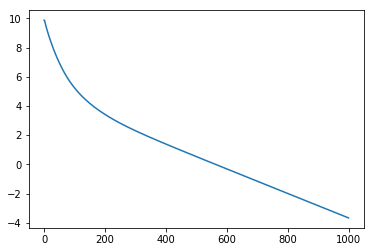

In [98]:
plt.plot(np.log(np.array(res) - 373.4040155581676))
plt.show()